<a href="https://colab.research.google.com/github/HIDDENDEN/Math_models/blob/main/MyWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing template ...


In [1]:
# !cp "drive/My Drive/Science_res/TestClass.py" .
# import TestClass


In [2]:
# test = TestClass.Vehicle(1,1,1)

In [3]:
# print(test.brake())

import my classes

*Select which test metod to implement*
*    *Set 'controller' variable next values:*
          
*          * **=1** to implement **base** variant*
*          * **=2** to implement **trigonometry** variant*
*          * **=3** to implement **degree** variant*

In [4]:
# controller = 1

controller = 2

# controller = 3

*Importing different files in case of chosen controller value*

In [5]:
if (controller == 1):
  !cp "drive/My Drive/Science_res/base/At.py" .
  import At

  !cp "drive/My Drive/Science_res/base/Fiu.py" .
  import Fiu

  !cp "drive/My Drive/Science_res/base/Alphax.py" .
  import Alphax

  !cp "drive/My Drive/Science_res/base/Kcit.py" .
  import Kcit


In [6]:
if (controller == 2):
  !cp "drive/My Drive/Science_res/trigonometric/At.py" .
  import At

  !cp "drive/My Drive/Science_res/trigonometric/Fiu.py" .
  import Fiu

  !cp "drive/My Drive/Science_res/trigonometric/Alphax.py" .
  import Alphax

  !cp "drive/My Drive/Science_res/trigonometric/Kcit.py" .
  import Kcit

In [7]:
if (controller == 3):
  !cp "drive/My Drive/Science_res/degreeFunctions/At.py" .
  import At

  !cp "drive/My Drive/Science_res/degreeFunctions/Fiu.py" .
  import Fiu

  !cp "drive/My Drive/Science_res/degreeFunctions/Alphax.py" .
  import Alphax

  !cp "drive/My Drive/Science_res/degreeFunctions/Kcit.py" .
  import Kcit

In [8]:
# !cp "drive/My Drive/Science_res/base/At.py" .
# import At

# !cp "drive/My Drive/Science_res/base/Fiu.py" .
# import Fiu

# !cp "drive/My Drive/Science_res/base/Alphax.py" .
# import Alphax

# !cp "drive/My Drive/Science_res/base/Kcit.py" .
# import Kcit



initialize functions

In [9]:
a_t = At.A_t()
kci_t = Kcit.Kci_t()
fi_u = Fiu.Fi_t()
alpha_x = Alphax.Alpha_x()

Import needed libs

In [10]:
import numpy as np
np.set_printoptions(linewidth=np.inf)# no extra newlines in output

import math

from copy import copy, deepcopy


Set steps size of X axys and T axys


And *x_0* , *t_0*

In [11]:
# Test L = 1 and T = 1
# Test num_of_steps N_x = 10 , N_t = 10
L = 1
T = 1
N_x = 100
N_t = 100

h_x = L/N_x
h_t = T/N_t

#Test segment 0 <= x <= 1
#Test segment 0 <= t <= 1

x_0 = 0
t_0 = 0

# **Method 1**

**Initialize two dim matrix for data storage**

In [12]:
matrix = np.zeros((N_x + 1,N_t + 1))

**Filling matrix with border conditions**

In [13]:
# First row filled with alpha(x_j)
for j in range(0, N_x+1):
  matrix[0][j] = alpha_x.compute(x_0 + h_x*j) 

# First colomn filled with kci(t_i)
for i in range(0, N_t+1):
  matrix[i][0] = kci_t.compute(t_0 + h_t*i)

print(matrix)

[[4.         3.98017453 3.96034907 ... 2.05710339 2.0372779  2.01745241]
 [3.96       0.         0.         ... 0.         0.         0.        ]
 [3.92       0.         0.         ... 0.         0.         0.        ]
 ...
 [0.08       0.         0.         ... 0.         0.         0.        ]
 [0.04       0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


*Define function for matrix computing*

In [14]:
def calculate_node(i, j, h_x, h_t, x_i, t_j, matrix):
  return (h_t * ( ( 1/h_x )*matrix[i][j-1] - (1/h_x - 1/h_t)*matrix[i][j] - a_t.compute(t_j)*fi_u.compute(matrix[i][j]) ) )


**Compute whole matrix**

In [15]:
# Let 1/((1/h_t) + (1/h_x)) be written as const_steps
# const_steps = 1/(1/h_t + 1/h_x)

for i in range(0, (N_t - 1) + 1):   # t defines rows
  for j in range(1, (N_x) + 1):     # x defines colomns
    matrix[i+1][j] = round( calculate_node(i,j, h_x, h_t, x_0+h_x*j, t_0 + h_t*i, matrix) ,3) # round 3 digits after comma

print(matrix)

# test = np.zeros(N_t)
# for i in range(len(test)):
#   test[i] = matrix[i][N_x]
#   print("test[i]= " + str(test[i]))

[[4.         3.98017453 3.96034907 ... 2.05710339 2.0372779  2.01745241]
 [3.96       3.95       3.93       ... 2.037      2.017      1.997     ]
 [3.92       3.91       3.9        ... 2.016      1.997      1.977     ]
 ...
 [0.08       0.089      0.098      ... 0.114      0.098      0.089     ]
 [0.04       0.049      0.058      ... 0.082      0.083      0.067     ]
 [0.         0.009      0.018      ... 0.061      0.051      0.052     ]]


**Drawing section**

In [16]:
# We'll draw using matplot lib
# importing the library 
import matplotlib.pyplot as plt  


*Drawing for U(x, t_const)*

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


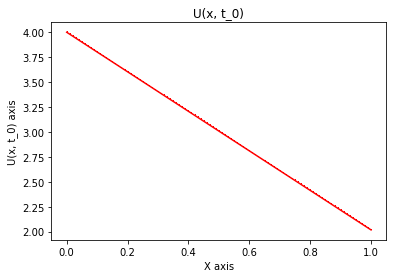

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


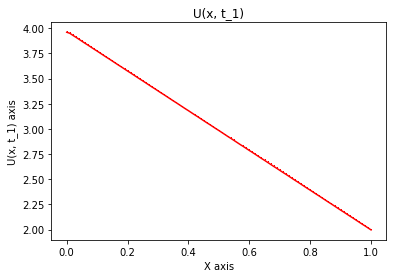

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


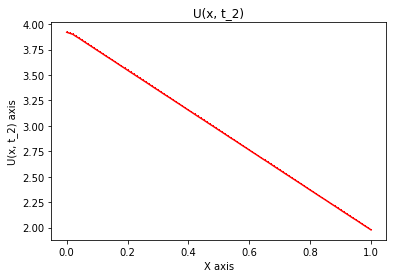

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


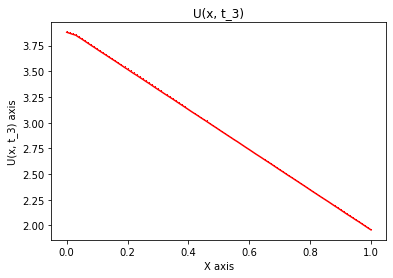

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


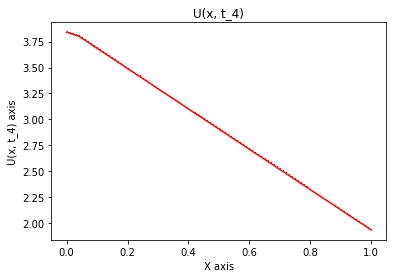

In [17]:
#data to be plotted
x = np.arange(x_0, x_0 + (N_x + 1)*h_x, h_x)

#set starting iteration ( i ) for t_i
#(selecting rows)
startIterationFor_t_i = 0
#set what num of first from t_i you want to display
num_of_graphs_rows = 5

for startIterationFor_t_i in range(num_of_graphs_rows):
  u = matrix[startIterationFor_t_i]
  #plotting
  plt.title("U(x, t_"+str(startIterationFor_t_i)+")")
  plt.xlabel("X axis")
  plt.ylabel("U(x, t_" +str(startIterationFor_t_i)+") axis")
  #show all x values
  # plt.xticks(x)
  #set y axis fixed size
  axes = plt.axes()
  # axes.set_ylim([0, 2.5])
  #draw
  plt.plot(x,u, marker=",",color = "red")

  plt.show()

# for comparing u(x, T/2)

x_m_1 = deepcopy(x)
u_m_1 = np.zeros(N_x + 1)
for j in range(len(u_m_1)):
  u_m_1[j] = matrix[int(N_t/2)][j]
# print(len(u_m_1))
# print(len(x_m_1))



*(Get h(t) = u(L,t) from method 1)*

In [18]:
# h_t_func_method_1 = matrix[:][N_x]
# print(h_t_func_method_1)

h_t_func_method_1 = np.zeros(N_t + 1)
for i in range(len(h_t_func_method_1)):
  h_t_func_method_1[i] = matrix[i][N_x]

t_arg_method_1 = np.arange(0,T+h_t,h_t)
# print(t_arg_method_1)
# print(len(t_arg_method_1))
# print(len(h_t_func_method_1))
# print(h_t_func_method_1)

*Drawing for U(x_const, t)*

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


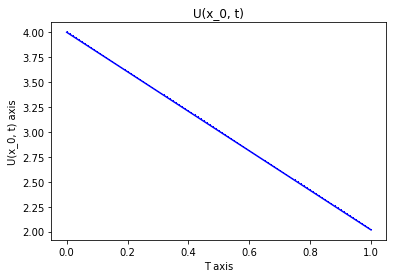

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


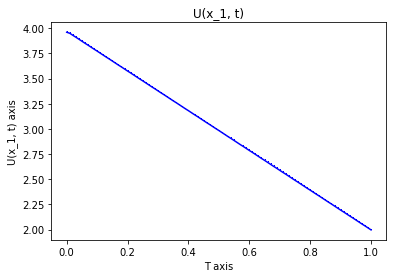

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


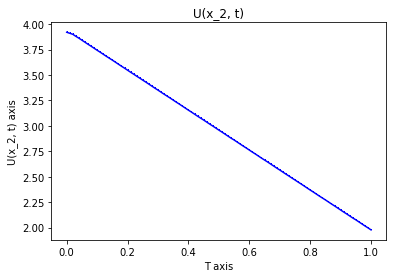

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


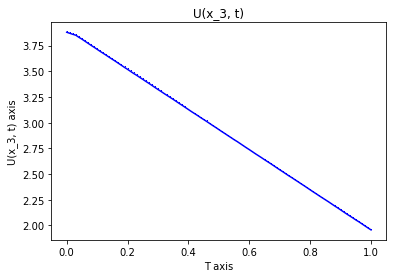

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


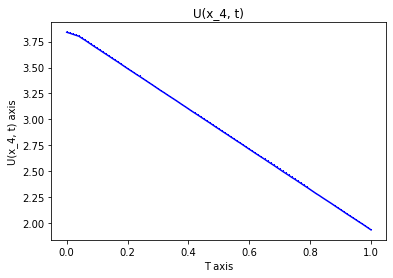

In [19]:
#data to be plotted
t = np.arange(t_0, t_0 + (N_t + 1)*h_t, h_t)

#set starting iteration ( j ) for x_j
#(selecting colomns)
startIterationFor_x_j = 0
#set what num of first from x_j you want to display
num_of_graphs_coloms = 5


for startIterationFor_x_j in range(num_of_graphs_coloms):
  u = matrix[:][startIterationFor_x_j]
  #plotting
  plt.title("U(x_"+str(startIterationFor_x_j)+", t)")
  plt.xlabel("T axis")
  plt.ylabel("U(x_" +str(startIterationFor_x_j)+", t) axis")
  #show all x values
  # plt.xticks(t)
  #set y axis fixed size
  axes = plt.axes()
  # axes.set_ylim([0, 2.5])
  #draw
  plt.plot(t,u, marker="," , color = "blue")
  plt.show()

***Drawing 3d (experimental)***

(surface plots)

In [20]:
from mpl_toolkits import mplot3d

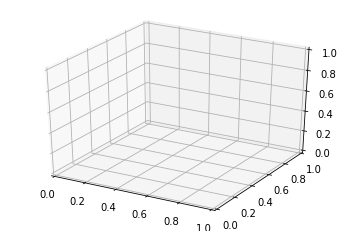

In [21]:
fig = plt.figure()
ax = plt.axes(projection="3d")

plt.show()

In [22]:
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [80]:
#create special numpy array
def special_data_array():
  ret_array=[]
  for i in range(0, (N_t) + 1):   # t defines rows
    for j in range(0, (N_x) + 1):     # x defines colomns
      # matrix[i+1][j] = round( calculate_node(i,j, h_x, h_t, x_0+h_x*j, t_0 + h_t*i,matrix) ,3) # round 3 digits after comma
      x = x_0 + h_x * j 
      t = t_0 + h_t * i
      z = matrix[i][j]
      add = np.array([x,t,z])
      # print("add =")
      # print(add)
      # np.append(ret_array, add)
      ret_array.append(add)
  ret_array=np.array(ret_array)
  return ret_array

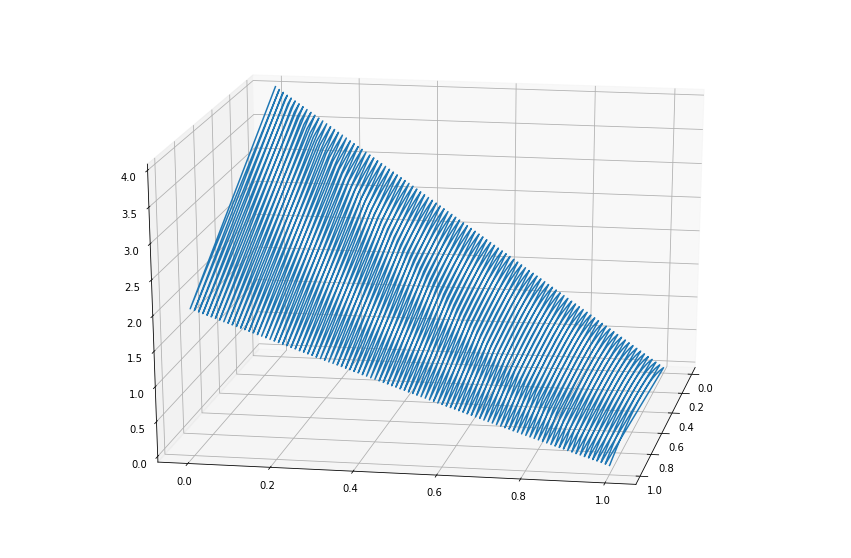

In [81]:
v=special_data_array()

my_fig_size = 10
fig = plt.figure(figsize=(my_fig_size+5,my_fig_size))
ax = fig.add_subplot(111, projection='3d')
ax.plot(v[:,0],v[:,1],v[:,2])
ax.view_init(20,10)
plt.show()

# # rotate the axes and update
# for angle in range(0, 360):
#     ax.view_init(30, angle)
#     plt.draw()
#     plt.pause(.001)
#     plt.show()
# # plt.show()

Testing colorscheme

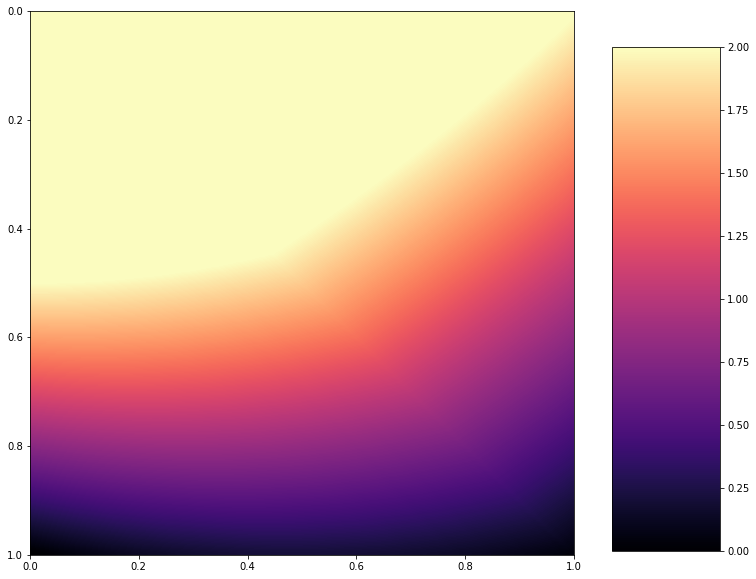

In [25]:
# print(matrix)
# fig = plt.figure(figsize=(my_fig_size+5,my_fig_size))
# ax = fig.add_subplot(111)
# ax.set_title('colorMap')
# p1 = plt.imshow(matrix,cmap='magma', aspect='equal',interpolation="lanczos", origin="upper",extent=(0,T,L,0))
# fig.colorbar(p1, ax=axs[0])
# fig.colorbar(p1, ax)

# from mpl_toolkits.axes_grid1 import make_axes_locatable

# fig, axs = plt.subplots(1, 2, figsize=(my_fig_size+5,my_fig_size), constrained_layout=True)
# p1 = axs[0].imshow(matrix,cmap='magma', aspect='equal',vmin = 0,vmax = 2 , interpolation="lanczos", origin="upper",extent=(0,T,L,0))
# fig.colorbar(p1, ax=axs[0])

fig = plt.figure(figsize=(my_fig_size+5,my_fig_size))
ax = plt.subplot(111)
im = ax.imshow(matrix,cmap='magma', aspect='equal',vmin = 0,vmax = 2 , interpolation="lanczos", origin="upper",extent=(0,T,L,0))
c = plt.colorbar(im, cax = fig.add_axes([0.8, 0.13, 0.1, 0.7]))

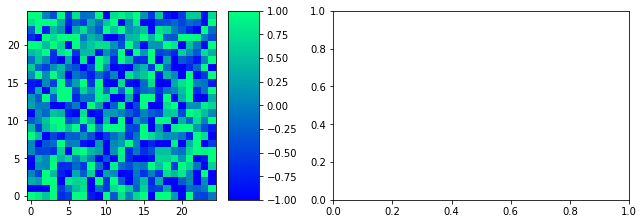

In [26]:
np.random.seed(19680801)
data = np.random.randn(25, 25)
fig, axs = plt.subplots(1, 2, figsize=(10,3), constrained_layout=True)
p1 = axs[0].imshow(data, cmap='winter', aspect='equal', vmin=-1, vmax=1, origin="lower")
fig.colorbar(p1, ax=axs[0])

# **#3rd Method**

**initialize two dim matrix for data storage on previous and current steps**

In [27]:
# matrix_prev = np.zeros((N_x + 1,N_t + 1))
# matrix_prev = deepcopy(matrix)

# matrix_cur = np.zeros((N_x + 1,N_t + 1))

Calculate integral (for method 3)
---
from a to b (f(x) dx)



In [28]:
# #calculate integral on simple segment
# def integral_on_simple_segment(c,d,h, f, x_i,t_j):
#   middle_point = (c+d)/2

#   approximated_index_i = int(round(middle_point,0)) #for taking value from counted matrix
#   approximated_index_j = int(round(middle_point - x_i + t_j)) #for taking value from counted matrix
#   return h* ( a_t.compute(middle_point) * fi_u.compute( f[approximated_index_i][approximated_index_j])   )

In [29]:
# def integral_A_to_B(a,b,f, x_i, t_j):
#   #define num of steps for calculating integral on segment
#   num_of_steps = 10

#   ret_value = 0.0
#   h=(b-a)/num_of_steps

#   for j in range(num_of_steps):
#     ret_value+=integral_on_simple_segment(a+j*h, a+(j+1)*h, h, f, x_i, t_j)
  
#   return ret_value


### *Iteration scheme implementation*

**set num of iterations**

In [30]:
num_of_iterations = 100

**start calculations**

In [31]:
# #calculating U_(n+1) = f(U_n)
# for steps in range(num_of_iterations):
#   for i in range(0,(N_t) + 1):  # t defines rows
#     for j in range(0, (N_x) + 1): # x defines colomns
#       #x_i
#       x_i=x_0+h_x*j
      
#       #t_j 
#       t_j = t_0 + h_t*i

#       if (t_j <= x_i):
#         matrix_cur[i][j] = round( alpha_x.compute(x_i - t_j) - integral_A_to_B(x_i - t_j, x_i, matrix_prev, x_i, t_j) , 3)
      
#       else:
#         matrix_cur[i][j] = round( kci_t.compute(t_j - x_i) - integral_A_to_B(0,x_i, matrix_prev, x_i, t_j) , 3)
      
#   matrix_prev=deepcopy(matrix_cur)

# print(matrix_cur)




TEST!!!

In [32]:
#calculate integral on simple segment
def integral_on_simple_segment_test(c,d,h, f, x_i,t_j, i ,j):
  middle_point = (c+d)/2

  # approximated_index_i = int(round(middle_point,0)) #for taking value from counted matrix
  # approximated_index_j = int(round(middle_point - x_i + t_j)) #for taking value from counted matrix
  return h* ( a_t.compute(middle_point) * fi_u.compute( f[i][j])   )
  # return h * calculate_mean(f,c,d)

In [33]:
# def integral_A_to_B_test(a,b,f, x_i, t_j):
#   #for x
#   j_start = int(round( (x_i-t_j - x_0)/h_x, 0))
#   j_finish = int(round( (x_i - x_0)/h_x, 0))

#   #for t
#   i_start = int(round( (0) , 0))
#   i_finish = int(round ( (t_j - t_0)/h_t , 0))
#   # i_finish = int(round ( (t_j + x_i - t_0)/h_t , 0))
  
#   #define num of steps for calculating integral on segment
#   num_of_steps = j_finish - j_start

#   #difference in h_x and h_t step
#   diff = int(round(h_x/h_t,0))
  

#   ret_value = 0.0
#   # h=(b-a)/num_of_steps

#   for j in range(num_of_steps):
#     ret_value+=integral_on_simple_segment_test(a+j*h_x, a+(j+1)*h_x, h_x, f, x_i, t_j, j_start+j, i_start+j*diff)
    
    

#   return ret_value


In [34]:
def Is_need_to_next_index_step(left,right,cur) :
  d1 = abs(left - cur)
  d2 = abs(right - cur)
  if (d1 < d2):
    return 0
  else:
    return 1

In [35]:
def integral_A_to_B_test(a,b,f, x_i, t_j):
  #for x
  j_start = int(round( (a - x_0)/h_x, 0))
  j_finish = int(round( (b - x_0)/h_x, 0))

  #for t
  i_start = int(round( (a - x_i + t_j - t_0)/h_t , 0))
  i_finish = int(round( (b - x_i + t_j - t_0)/h_t , 0))
  

  #NEW BLOCK FOR MORE ACCURACY
  flag = Is_need_to_next_index_step(f[i_start][j_start],f[i_start][j_start+1],x_i)
  j_start = j_start + 1* flag
  j_finish = j_finish + 1*flag


  
  #define num of steps for calculating integral on segment
  num_of_steps = j_finish - j_start

  #difference in h_x and h_t step
  diff = int(round(h_x/h_t,0))
  

  ret_value = 0.0
  # h=(b-a)/num_of_steps

  for j in range(num_of_steps):
    ret_value+=integral_on_simple_segment_test(a+j*h_x, a+(j+1)*h_x, h_x, f, x_i, t_j, j_start+j, i_start+j*diff)
    
    

  return ret_value


In [36]:
matrix_prev = np.ones((N_x + 1,N_t + 1))

# First row filled with alpha(x_j)
for j in range(0, N_x+1):
  matrix_prev[0][j] = alpha_x.compute(x_0 + h_x*j)


# First colomn filled with kci(t_i)
for i in range(0, N_t+1):
  matrix_prev[i][0] = kci_t.compute(t_0 + h_t*i)


matrix_cur = deepcopy(matrix_prev)

#calculating U_(n+1) = f(U_n)
for steps in range(num_of_iterations):
  for i in range(1,(N_t) + 1):  # t defines rows
    for j in range(1, (N_x) + 1): # x defines colomns
      # print(str(i) +"+" +str(j))
      #x_i
      x_i=x_0+h_x*j
      
      #t_j 
      t_j = t_0 + h_t*i

      if (t_j <= x_i):
        matrix_cur[i][j] =round( alpha_x.compute(x_i - t_j) - integral_A_to_B_test(x_i - t_j, x_i,matrix_prev, x_i, t_j) , 3)
      
      else:
        matrix_cur[i][j] =round( kci_t.compute(t_j - x_i) - integral_A_to_B_test(0,x_i,matrix_prev, x_i, t_j) , 3)
      
      matrix_prev=deepcopy(matrix_cur)

print(matrix_cur)


[[ 4.          3.98017453  3.96034907 ...  2.05710339  2.0372779   2.01745241]
 [ 3.96        3.95        3.931      ...  2.046       2.027       2.007     ]
 [ 3.92        3.91        3.901      ...  2.035       2.016       1.996     ]
 ...
 [ 0.08        0.08        0.079      ...  0.121       0.119       0.117     ]
 [ 0.04        0.04        0.039      ...  0.081       0.09        0.088     ]
 [ 0.         -0.         -0.         ...  0.047       0.051       0.06      ]]


**Drawing section**

Drawing method_3 results (2d)

*Drawing for U(x, t_const)*

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


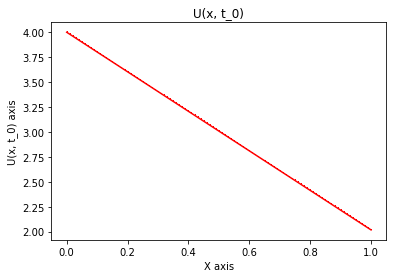

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


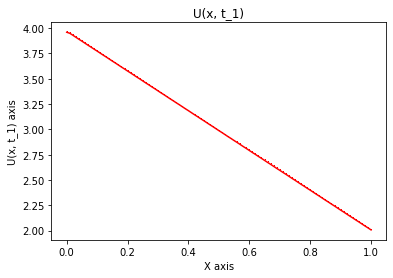

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


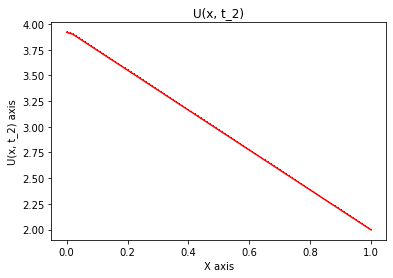

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


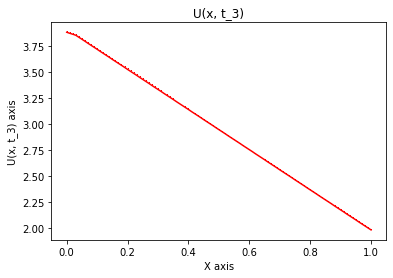

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


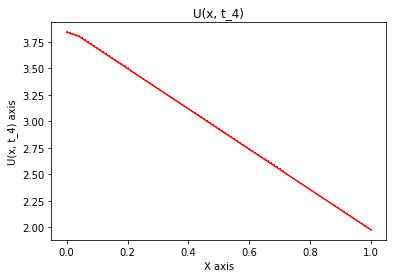

In [37]:
#data to be plotted
x = np.arange(x_0, x_0 + (N_x + 1)*h_x, h_x)

#set starting iteration ( i ) for t_i
#(selecting rows)
startIterationFor_t_i = 0
#set what num of first from t_i you want to display
num_of_graphs_rows = 5

for startIterationFor_t_i in range(num_of_graphs_rows):
  u = matrix_cur[startIterationFor_t_i]
  #plotting
  plt.title("U(x, t_"+str(startIterationFor_t_i)+")")
  plt.xlabel("X axis")
  plt.ylabel("U(x, t_" +str(startIterationFor_t_i)+") axis")
  #show all x values
  # plt.xticks(x)
  #set y axis fixed size
  axes = plt.axes()
  # axes.set_ylim([0, 4])
  #draw
  plt.plot(x,u,  marker=',', color = "red")
  plt.show()

# for comparing u(x, T/2)

x_m_3 = deepcopy(x)
u_m_3 = np.zeros(N_x + 1)
for j in range(len(u_m_3)):
  u_m_3[j] = matrix_cur[int(N_t/2)][j]
# print(len(u_m_3))
# print(len(x_m_3))


*Getting h(t) = u(L,t) func from method 3 *

In [38]:
h_t_func_method_3 = np.zeros(N_t + 1)
for i in range(len(h_t_func_method_3)):
  h_t_func_method_3[i] = matrix_cur[i][N_x]

t_arg_method_3 = np.arange(0,T+h_t,h_t)

print(len(t_arg_method_3))
print(len(h_t_func_method_3))

101
101


*Drawing for U(x_const, t)*

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


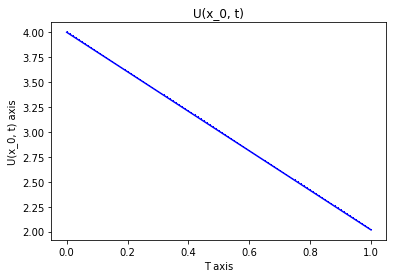

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


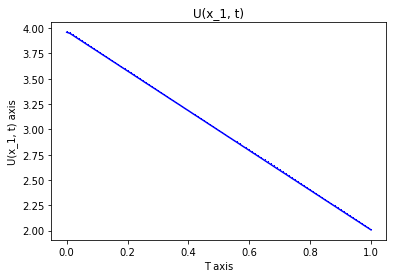

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


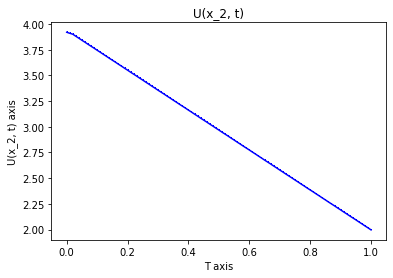

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


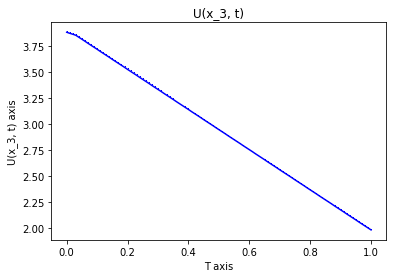

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


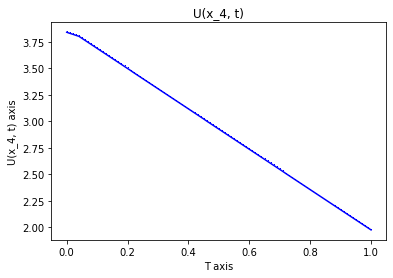

In [39]:
#data to be plotted
t = np.arange(t_0, t_0 + (N_t + 1)*h_t, h_t)

#set starting iteration ( j ) for x_j
#(selecting colomns)
startIterationFor_x_j = 0
#set what num of first from x_j you want to display
num_of_graphs_coloms = 5


for startIterationFor_x_j in range(num_of_graphs_coloms):
  u = matrix_cur[:][startIterationFor_x_j]
  #plotting
  plt.title("U(x_"+str(startIterationFor_x_j)+", t)")
  plt.xlabel("T axis")
  plt.ylabel("U(x_" +str(startIterationFor_x_j)+", t) axis")
  #show all x values
  # plt.xticks(t)
  #set y axis fixed size
  axes = plt.axes()
  # axes.set_ylim([0, 4])
  #draw
  plt.plot(t,u, marker=',', color = "blue")
  plt.show()

Drawing method_3 results (3d)

In [40]:
#create special numpy array
def special_data_array(temp_matrix):
  ret_array=[]
  for i in range(0, (N_t) + 1):   # t defines rows
    for j in range(0, (N_x) + 1):     # x defines colomns
      # matrix[i+1][j] = round( calculate_node(i,j, h_x, h_t, x_0+h_x*j, t_0 + h_t*i,matrix) ,3) # round 3 digits after comma
      x = x_0 + h_x * j 
      t = t_0 + h_t * i
      z = temp_matrix[i][j]
      add = np.array([x,t,z])
      # print("add =")
      # print(add)
      # np.append(ret_array, add)
      ret_array.append(add)
  ret_array=np.array(ret_array)
  return ret_array

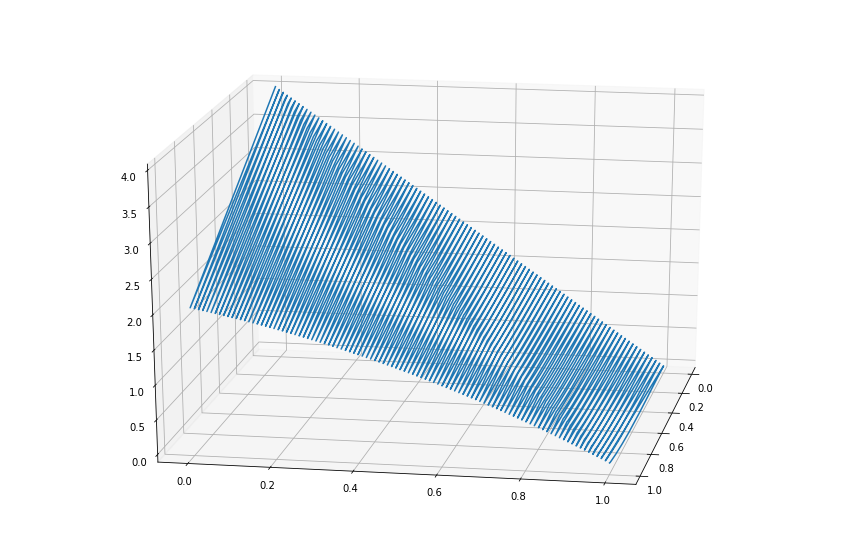

In [41]:
v=special_data_array(matrix_cur)

my_fig_size = 10
fig = plt.figure(figsize=(my_fig_size+5,my_fig_size))
ax = fig.add_subplot(111, projection='3d')
ax.plot(v[:,0],v[:,1],v[:,2])
ax.view_init(20,10)
plt.show()

# **#2nd Method**

## *Explicit computation scheme*

## ----------------------------------------

*Calculating integral on simple segment*

In [42]:
#calculate integral on simple segment (for function a(s))
def integral_on_simple_segment_method_2(c,d,h, f):
  # c - start value
  # d - end value
  # h - step ( equals to: (d - c) )
  middle_point = (c+d)/2

  return h * f.compute(middle_point)

*Calculating integral on given segment from A to B*

In [43]:
def integral_A_to_B_method_2(a,b,f):
  #define num of steps for calculating integral on segment
  num_of_steps = 10

  ret_value = 0.0
  h=(b-a)/num_of_steps

  for j in range(num_of_steps):
    ret_value+=integral_on_simple_segment_method_2(a+j*h, a+(j+1)*h, h, f)
  
  return ret_value




## ----------------------------------------

## *Code block for implementing inverse function for fi(U)*

*Setting grids*

x grid

In [44]:
# x_grid range = x_grid_length   x_grid = [-1/2 * x_grid_length ; 1/2 * x_grid_length]
x_grid_range = 100

x_grid_length = x_grid_range * 2 #for minus values

x_grid_length_for_array_implementation = x_grid_length + 1
x_grid = np.zeros(x_grid_length_for_array_implementation)
for j in range(x_grid_length_for_array_implementation):

  x_grid[j] = j - (1/2) * x_grid_length

print (x_grid)

[-100.  -99.  -98.  -97.  -96.  -95.  -94.  -93.  -92.  -91.  -90.  -89.  -88.  -87.  -86.  -85.  -84.  -83.  -82.  -81.  -80.  -79.  -78.  -77.  -76.  -75.  -74.  -73.  -72.  -71.  -70.  -69.  -68.  -67.  -66.  -65.  -64.  -63.  -62.  -61.  -60.  -59.  -58.  -57.  -56.  -55.  -54.  -53.  -52.  -51.  -50.  -49.  -48.  -47.  -46.  -45.  -44.  -43.  -42.  -41.  -40.  -39.  -38.  -37.  -36.  -35.  -34.  -33.  -32.  -31.  -30.  -29.  -28.  -27.  -26.  -25.  -24.  -23.  -22.  -21.  -20.  -19.  -18.  -17.  -16.  -15.  -14.  -13.  -12.  -11.  -10.   -9.   -8.   -7.   -6.   -5.   -4.   -3.   -2.   -1.    0.    1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.   12.   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.   24.   25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.   36.   37.   38.   39.   40.   41.   42.   43.   44.   45.   46.   47.   48.   49.   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.   60.   61.   62.   63.   64.   65.   6

y grid

In [45]:
# y_grid range = y_grid_length   y_grid = [-1/2 * y_grid_length ; 1/2 * y_grid_length]
y_grid_range = 100

y_grid_length = y_grid_range * 2

y_grid_length_for_array_implementation = y_grid_length + 1
y_grid = np.zeros(y_grid_length_for_array_implementation)
for j in range(y_grid_length_for_array_implementation):

  y_grid[j] = j - (1/2) * y_grid_length

print (y_grid)

[-100.  -99.  -98.  -97.  -96.  -95.  -94.  -93.  -92.  -91.  -90.  -89.  -88.  -87.  -86.  -85.  -84.  -83.  -82.  -81.  -80.  -79.  -78.  -77.  -76.  -75.  -74.  -73.  -72.  -71.  -70.  -69.  -68.  -67.  -66.  -65.  -64.  -63.  -62.  -61.  -60.  -59.  -58.  -57.  -56.  -55.  -54.  -53.  -52.  -51.  -50.  -49.  -48.  -47.  -46.  -45.  -44.  -43.  -42.  -41.  -40.  -39.  -38.  -37.  -36.  -35.  -34.  -33.  -32.  -31.  -30.  -29.  -28.  -27.  -26.  -25.  -24.  -23.  -22.  -21.  -20.  -19.  -18.  -17.  -16.  -15.  -14.  -13.  -12.  -11.  -10.   -9.   -8.   -7.   -6.   -5.   -4.   -3.   -2.   -1.    0.    1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.   12.   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.   24.   25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.   36.   37.   38.   39.   40.   41.   42.   43.   44.   45.   46.   47.   48.   49.   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.   60.   61.   62.   63.   64.   65.   6

Fill in the grid of function values fi_u (x)

In [46]:
# our y values will be structure elements = [cur value ; argument that entered that cur value]
class fi_u_struct:

    def __init__(self, f_value , arg_value):
      self.f_value = f_value
      self.arg_value = arg_value

    def get_f_value(self):
      return self.f_value

    def get_arg_value(self):
      return self.arg_value
    
    def __str__(self):
      return "[ "+str(self.f_value) + " || " + str(self.arg_value) + " ];"

In [47]:
#uncounted values will be set as np.NaN

#fi_u(x) values will be strored as a structure = {grid_value ; x that gave that result}

init_array_struct = fi_u_struct(0.,0.)

fi_u_grid  = np.empty(shape=(x_grid_length_for_array_implementation,), dtype=object)

for j in range(x_grid_length_for_array_implementation):
  arg = x_grid[j]
  f_value = fi_u.compute(arg)

  fi_u_grid[j] = fi_u_struct(f_value , arg)

# for j in range(x_grid_length_for_array_implementation):
#   print (fi_u_grid[j])


Sorting fi_u grid by func values in ascending order

In [48]:
list1 = fi_u_grid.tolist()
list1.sort(key = lambda x: x.get_f_value(), reverse=False)
# for j in range(x_grid_length_for_array_implementation):
#   print (list1[j])

fi_u_grid=np.array(list1)
# for j in range(x_grid_length_for_array_implementation):
#   print (fi_u_grid[j])

**Compute inverse function for fi(u)**

In [49]:
def search_left_index_fi_u_grid(value):
  for i in range(len(fi_u_grid)):
    if (fi_u_grid[i].get_f_value() <= value):# [ * | | value | | | |]
      if ((i+1)<len(fi_u_grid)):# i not the right side of array
        if (fi_u_grid[i+1].get_f_value() < value):
          continue
        else:
          return i
      else:# i the right side of array --- BAD SITUTION - THROW EXCEPTION(need to compute wider grid_fi_u)
        raise ValueError('Need to compute wider grid_fi_u')
    else:# i the left side of array bigger than value --- BAD SITUTION - THROW EXCEPTION(need to compute wider grid_fi_u)
      raise ValueError('Need to compute wider grid_fi_u LEFT SIDE')


In [50]:
def compute_weight(value, our_point, whole_dist_between_border_points):
  return ( (abs(value - our_point)) / whole_dist_between_border_points)

In [51]:
def inverse_fi(y_0):
  left_index = search_left_index_fi_u_grid(y_0)

  #search left and right side distance ftom y_0   ---> this will form an impact that left and right points enter
  left_point_value = fi_u_grid[left_index].get_f_value()
  right_point_value = fi_u_grid[left_index + 1].get_f_value()

  whole_dist_between_border_points = abs(right_point_value - left_point_value)

  #compute weights
  left_side_weight = compute_weight(y_0,left_point_value,whole_dist_between_border_points)

  right_side_weight = compute_weight(y_0,right_point_value,whole_dist_between_border_points)

  #compute return value
  arg1 = fi_u_grid[left_index].get_arg_value()
  weight_arg1 = (1 - left_side_weight)

  arg2 = fi_u_grid[left_index + 1].get_arg_value()
  weight_arg2 = (1 - right_side_weight)

  return weight_arg1 * arg1   +  weight_arg2 * arg2





### ***Calculating U(x , t) values on the grid using method # 2***

In [52]:
matrix_method_2 = np.zeros((N_x + 1,N_t + 1))

In [53]:
# First row filled with alpha(x_j)
for j in range(0, N_x+1):
  matrix_method_2[0][j] = alpha_x.compute(x_0 + h_x*j)

# First colomn filled with kci(t_i)
for i in range(0, N_t+1):
  matrix_method_2[i][0] = kci_t.compute(t_0 + h_t*i)

print(matrix_method_2)

[[4.         3.98017453 3.96034907 ... 2.05710339 2.0372779  2.01745241]
 [3.96       0.         0.         ... 0.         0.         0.        ]
 [3.92       0.         0.         ... 0.         0.         0.        ]
 ...
 [0.08       0.         0.         ... 0.         0.         0.        ]
 [0.04       0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


*calculating entry point for inverse fi(u) function*

In [54]:
def calculate_point_1(x_j,t_i):#for situation 0 <= t <= x <= L
  fi_calculated_from_alpha = fi_u.compute(alpha_x.compute(x_j - t_i))
  
  calculated_integral = integral_A_to_B_method_2(x_j - t_i, x_j, a_t)

  return fi_calculated_from_alpha * math.exp( (-1) * calculated_integral )

In [55]:
def calculate_point_2(x_j,t_i):#for situation 0 <= x <= t <= T
  fi_calculated_from_kci = fi_u.compute( kci_t.compute(t_i - x_j) )
  
  calculated_integral = integral_A_to_B_method_2( 0, x_j, a_t )

  return fi_calculated_from_kci * math.exp( (-1) * calculated_integral )

*Processing matrix*

In [56]:
for i in range(1, (N_t) + 1):   # t defines rows
  for j in range(1, (N_x) + 1):     # x defines colomns

    x_j = x_0 + j * h_x

    t_i = t_0 + i * h_t

    if (t_i <= x_j):#for situation 0 <= t <= x <= L
      y_0 = calculate_point_1(x_j,t_i)

      matrix_method_2[i][j] = round( inverse_fi(y_0), 3 )
    
    else:#for situation 0 <= x <= t <= T
      y_0 = calculate_point_2(x_j,t_i)

      matrix_method_2[i][j] = round( inverse_fi(y_0), 3 )

print(matrix_method_2)

[[ 4.00000000e+00  3.98017453e+00  3.96034907e+00 ...  2.05710339e+00  2.03727790e+00  2.01745241e+00]
 [ 3.96000000e+00  3.80200000e+00  3.78300000e+00 ...  1.91600000e+00  1.89600000e+00  1.87700000e+00]
 [ 3.92000000e+00  3.76300000e+00  3.60800000e+00 ...  1.77700000e+00  1.75800000e+00  1.73900000e+00]
 ...
 [ 8.00000000e-02 -1.00000000e-03 -8.20000000e-02 ... -4.60300000e+00 -4.60600000e+00 -4.60900000e+00]
 [ 4.00000000e-02 -4.00000000e-02 -1.20000000e-01 ... -4.60900000e+00 -4.63100000e+00 -4.63400000e+00]
 [ 0.00000000e+00 -8.00000000e-02 -1.58000000e-01 ... -4.61400000e+00 -4.63700000e+00 -4.65800000e+00]]


**Drawing section**

*Drawing method_2 results (2D)*

Drawing for U(x, t_const)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


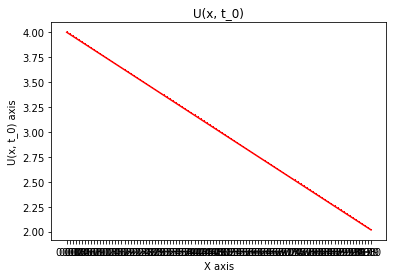

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


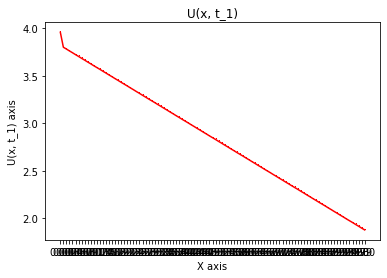

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


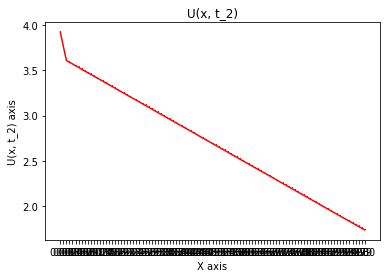

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


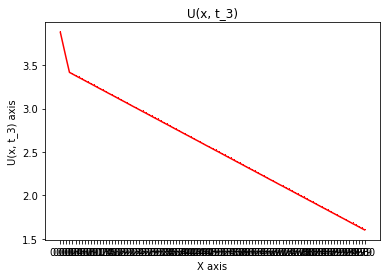

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


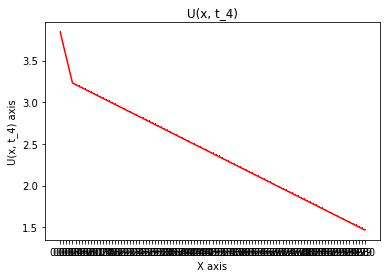

In [57]:
#data to be plotted
x = np.arange(x_0, x_0 + (N_x + 1)*h_x, h_x)

#set starting iteration ( i ) for t_i
#(selecting rows)
startIterationFor_t_i = 0
#set what num of first from t_i you want to display
num_of_graphs_rows = 5

for startIterationFor_t_i in range(num_of_graphs_rows):
  u = matrix_method_2[startIterationFor_t_i]
  #plotting
  plt.title("U(x, t_"+str(startIterationFor_t_i)+")")
  plt.xlabel("X axis")
  plt.ylabel("U(x, t_" +str(startIterationFor_t_i)+") axis")
  #show all x values
  plt.xticks(x)
  #set y axis fixed size
  axes = plt.axes()
  # axes.set_ylim([0, 4])
  #draw
  plt.plot(x,u, marker=',', color = "red")
  plt.show()

# for comparing u(x, T/2)

x_m_2 = deepcopy(x)
u_m_2 = np.zeros(N_x + 1)
for j in range(len(u_m_2)):
  u_m_2[j] = matrix_method_2[int(N_t/2)][j]
  # u_m_2[j] = matrix_method_2[int(N_t)][j]
# print(len(u_m_2))
# print(len(x_m_2)) 

*Getting h(t) = u(L,t) func from method 2 *

In [58]:
h_t_func_method_2 = np.zeros(N_t + 1)
for i in range(len(h_t_func_method_2)):
  h_t_func_method_2[i] = matrix_cur[i][N_x]

t_arg_method_2 = np.arange(0,T+h_t,h_t)

print(len(t_arg_method_2))
print(len(h_t_func_method_2))

101
101


Drawing for U(x_const, t)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


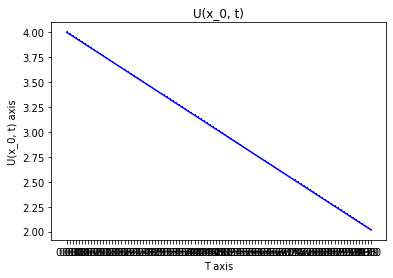

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


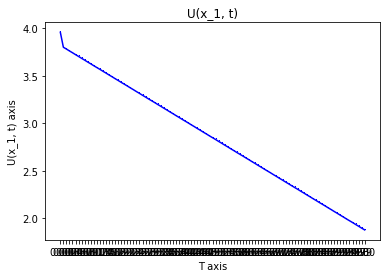

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


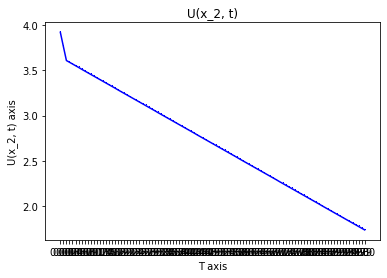

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


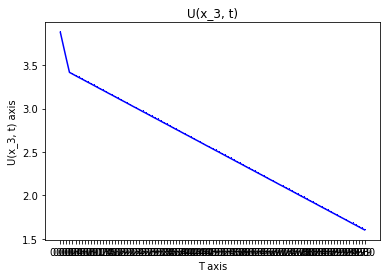

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


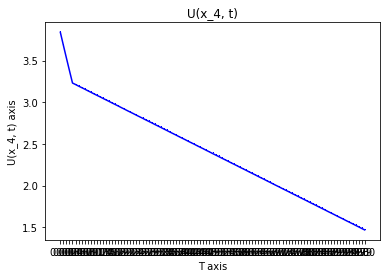

In [59]:
#data to be plotted
t = np.arange(t_0, t_0 + (N_t + 1)*h_t, h_t)

#set starting iteration ( j ) for x_j
#(selecting colomns)
startIterationFor_x_j = 0
#set what num of first from x_j you want to display
num_of_graphs_coloms = 5


for startIterationFor_x_j in range(num_of_graphs_coloms):
  u = matrix_method_2[:][startIterationFor_x_j]
  #plotting
  plt.title("U(x_"+str(startIterationFor_x_j)+", t)")
  plt.xlabel("T axis")
  plt.ylabel("U(x_" +str(startIterationFor_x_j)+", t) axis")
  #show all x values
  plt.xticks(t)
  #set y axis fixed size
  axes = plt.axes()
  # axes.set_ylim([0, 4])
  #draw
  plt.plot(t,u, marker=',', color = "blue")
  plt.show()


Plotting method_2 (3D)

In [60]:
#create special numpy array
def special_data_array(temp_matrix):
  ret_array=[]
  for i in range(0, (N_t) + 1):   # t defines rows
    for j in range(0, (N_x) + 1):     # x defines colomns
      # matrix[i+1][j] = round( calculate_node(i,j, h_x, h_t, x_0+h_x*j, t_0 + h_t*i,matrix) ,3) # round 3 digits after comma
      x = x_0 + h_x * j 
      t = t_0 + h_t * i
      z = temp_matrix[i][j]
      add = np.array([x,t,z])
      # print("add =")
      # print(add)
      # np.append(ret_array, add)
      ret_array.append(add)
  ret_array=np.array(ret_array)
  return ret_array

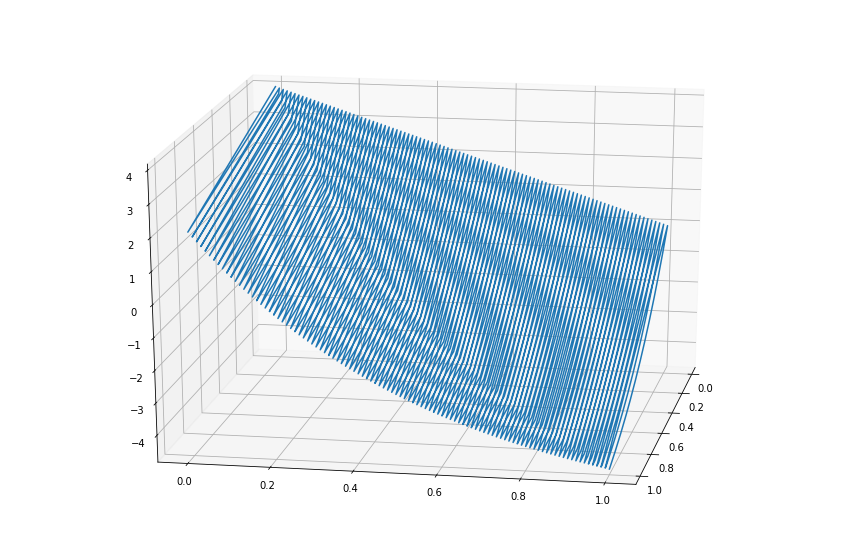

In [61]:
v=special_data_array(matrix_method_2)

my_fig_size = 10
fig = plt.figure(figsize=(my_fig_size+5,my_fig_size))
ax = fig.add_subplot(111, projection='3d')
ax.plot(v[:,0],v[:,1],v[:,2])
ax.view_init(20,10)
plt.show()

# **Compare 3 metods**

***Comparing u(x,T/2)***

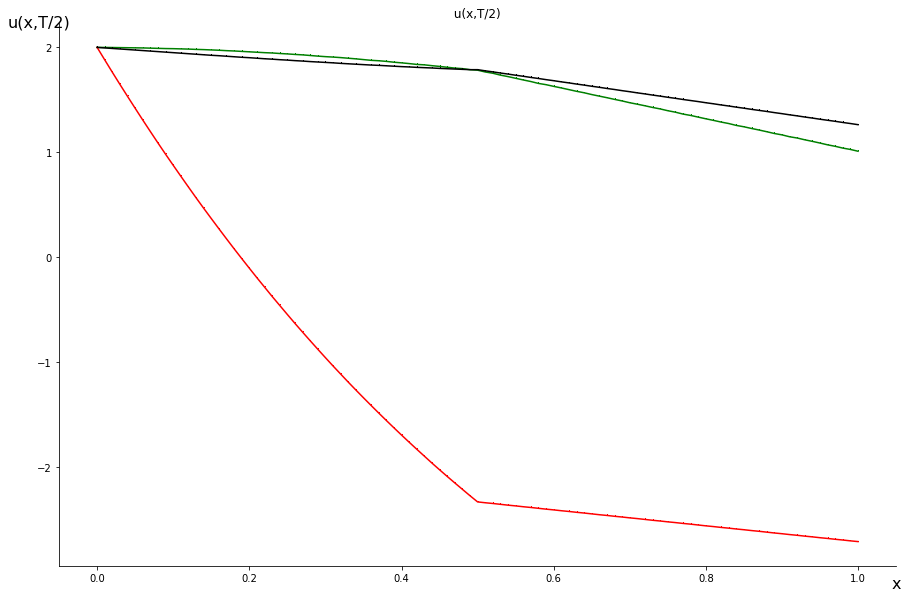

In [62]:
# todo
# plt.plot(x_m_1, u_m_1, 'g')  # solid green
# plt.plot(x_m_2, u_m_2, 'c') # dashed cyan
# plt.plot(x_m_3, u_m_3, 'k') # dashdot black
# # plt.plot(x, x + 3, ':r');  # dotted red

t = x_m_1
u = u_m_1
# y_d1 = np.diff(y,n=1)
# y_d1 = np.true_divide(y_d1,h_x)
yy=np.zeros(len(x_m_1))
for i in range(len(t)):
  yy[i]=u[i]

my_fig_size = 10
fig = plt.figure(figsize=(my_fig_size+5,my_fig_size))

ax=fig.add_subplot(111)

#set title
ax.set_title(' u(x,T/2) ')

# Set common labels
fig.text(0.9, 0.1, 'x', ha='center', va='center',fontsize=16)
fig.text(0.106, 0.88, 'u(x,T/2)', ha='center', va='center',fontsize=16)
# fig.text(0.06, 0.5, 'h(t)', ha='center', va='center', rotation='vertical',fontsize=16)


ax.plot(t, yy,marker=",",color = "g")
plt.plot(x_m_2,u_m_2, marker=",",color = "r")
plt.plot(x_m_3,u_m_3, marker=",",color = "k")


# ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
# ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

# remove the ticks from the top and right edges
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

***Comparing h(t)***

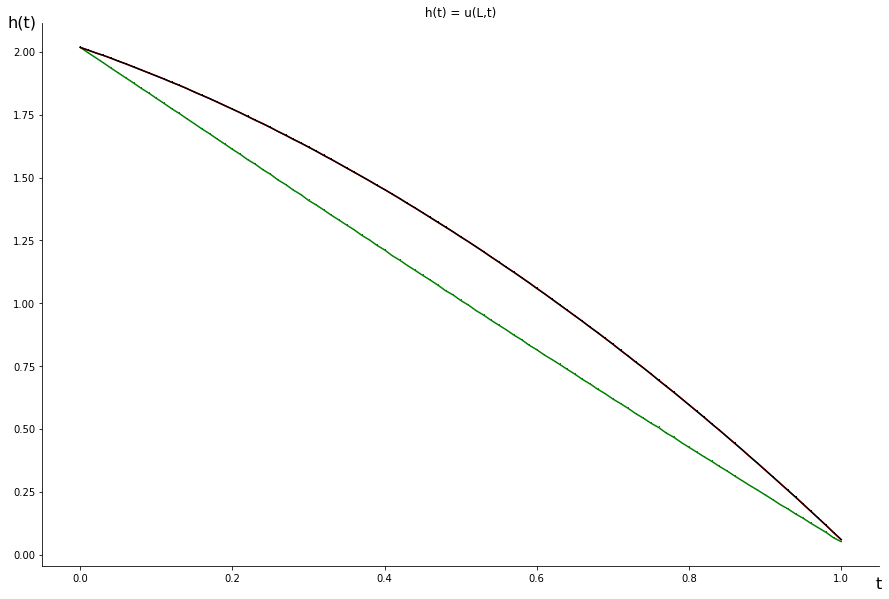

In [63]:
t = t_arg_method_1
u = h_t_func_method_1
# y_d1 = np.diff(y,n=1)
# y_d1 = np.true_divide(y_d1,h_x)
yy=np.zeros(len(t_arg_method_1))
for i in range(len(t)):
  yy[i]=u[i]

my_fig_size = 10
fig = plt.figure(figsize=(my_fig_size+5,my_fig_size))

ax=fig.add_subplot(111)

#set title
ax.set_title(' h(t) = u(L,t) ')

# Set common labels
fig.text(0.9, 0.1, 't', ha='center', va='center',fontsize=16)
fig.text(0.106, 0.88, 'h(t)', ha='center', va='center',fontsize=16)
# fig.text(0.06, 0.5, 'h(t)', ha='center', va='center', rotation='vertical',fontsize=16)


ax.plot(t, yy,marker=",",color = "g")
plt.plot(t_arg_method_2,h_t_func_method_2, marker=",",color = "r")
plt.plot(t_arg_method_3,h_t_func_method_3, marker=",",color = "k")


# ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
# ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

# remove the ticks from the top and right edges
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# **Inverse problem #1**

h(t) function
h(t) = U(L, t)

h(t) array view

In [64]:
def h_t_compute(index):
  return matrix_method_2[index][N_x]


fi_1(t) = fi (alpha (x) )

In [65]:
def fi_1_t(t):
  return fi_u.compute(alpha_x.compute(t))

## *Code block for implementing inverse function for h(t)*

t_grid

In [66]:
t_grid_range = N_t + 1

t_grid = np.zeros(t_grid_range)
for j in range(t_grid_range):

  t_grid[j] = t_0 + j*h_t

print (t_grid)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.  ]


Fill in the grid of function values h(t)

In [67]:
# our y values will be structure elements = [cur value ; argument that entered that cur value]
class h_t_struct:

    def __init__(self, h_value , arg_value):
      self.h_value = h_value
      self.arg_value = arg_value

    def get_h_value(self):
      return self.h_value

    def get_arg_value(self):
      return self.arg_value
    
    def __str__(self):
      return "[ "+str(self.h_value) + " || " + str(self.arg_value) + " ];"

In [68]:
#uncounted values will be set as np.NaN

# h(t) values will be strored as a structure = {grid_value ; t that gave that result}

init_array_struct = h_t_struct(0.,0.)

h_t_grid  = np.empty(shape=(t_grid_range,), dtype=object)

for i in range(t_grid_range):
  arg = round( t_grid[i] , 6)

  # h_value = h_t.compute(arg)

  h_value = round (h_t_compute(i) , 3)

  h_t_grid[i] = h_t_struct(h_value , arg)

for i in range(t_grid_range):
  print (h_t_grid[i])


[ 2.017 || 0.0 ];
[ 1.877 || 0.01 ];
[ 1.739 || 0.02 ];
[ 1.603 || 0.03 ];
[ 1.469 || 0.04 ];
[ 1.338 || 0.05 ];
[ 1.209 || 0.06 ];
[ 1.082 || 0.07 ];
[ 0.958 || 0.08 ];
[ 0.836 || 0.09 ];
[ 0.715 || 0.1 ];
[ 0.597 || 0.11 ];
[ 0.481 || 0.12 ];
[ 0.367 || 0.13 ];
[ 0.255 || 0.14 ];
[ 0.145 || 0.15 ];
[ 0.037 || 0.16 ];
[ -0.07 || 0.17 ];
[ -0.174 || 0.18 ];
[ -0.277 || 0.19 ];
[ -0.378 || 0.2 ];
[ -0.477 || 0.21 ];
[ -0.574 || 0.22 ];
[ -0.67 || 0.23 ];
[ -0.764 || 0.24 ];
[ -0.856 || 0.25 ];
[ -0.947 || 0.26 ];
[ -1.036 || 0.27 ];
[ -1.124 || 0.28 ];
[ -1.21 || 0.29 ];
[ -1.295 || 0.3 ];
[ -1.378 || 0.31 ];
[ -1.459 || 0.32 ];
[ -1.54 || 0.33 ];
[ -1.618 || 0.34 ];
[ -1.696 || 0.35 ];
[ -1.772 || 0.36 ];
[ -1.847 || 0.37 ];
[ -1.92 || 0.38 ];
[ -1.992 || 0.39 ];
[ -2.063 || 0.4 ];
[ -2.133 || 0.41 ];
[ -2.201 || 0.42 ];
[ -2.269 || 0.43 ];
[ -2.335 || 0.44 ];
[ -2.4 || 0.45 ];
[ -2.463 || 0.46 ];
[ -2.526 || 0.47 ];
[ -2.588 || 0.48 ];
[ -2.648 || 0.49 ];
[ -2.707 || 0.5 ];
[ -2.766 |

Sorting h_t grid by func values in ascending order

In [69]:
list1 = h_t_grid.tolist()
list1.sort(key = lambda x: x.get_h_value(), reverse=False)

h_t_grid=np.array(list1)

**Compute inverse function for h(t)**

In [70]:
def search_left_index_h_t_grid(value):
  for i in range(len(h_t_grid)):
    if (h_t_grid[i].get_h_value() <= value):# [ * | | value | | | |]
      if ((i+1)<len(h_t_grid)):# i not the right side of array
        if (h_t_grid[i+1].get_h_value() < value):
          continue
        else:
          return i
      else:# i the right side of array --- BAD SITUTION - THROW EXCEPTION(need to compute wider grid_fi_u)
        # raise ValueError('Need to compute wider grid_fi_u')
        return i
    else:# i the left side of array bigger than value --- BAD SITUTION - THROW EXCEPTION(need to compute wider grid_fi_u)
      # raise ValueError('Need to compute wider grid_fi_u LEFT SIDE')
      return i


In [71]:
def compute_weight(value, our_point, whole_dist_between_border_points):
  return ( (abs(value - our_point)) / whole_dist_between_border_points)

In [72]:
def inverse_h(y_0):
  left_index = search_left_index_h_t_grid(y_0)
  if( left_index != N_t):
      

    #search left and right side distance ftom y_0   ---> this will form an impact that left and right points enter
    left_point_value = h_t_grid[left_index].get_h_value()
    right_point_value = h_t_grid[left_index + 1].get_h_value()

    whole_dist_between_border_points = abs(right_point_value - left_point_value)

    #compute weights
    left_side_weight = compute_weight(y_0,left_point_value,whole_dist_between_border_points)

    right_side_weight = compute_weight(y_0,right_point_value,whole_dist_between_border_points)

    #compute return value
    arg1 = h_t_grid[left_index].get_arg_value()
    weight_arg1 = (1 - left_side_weight)

    arg2 = h_t_grid[left_index + 1].get_arg_value()
    weight_arg2 = (1 - right_side_weight)

    return weight_arg1 * arg1   +  weight_arg2 * arg2
  
  else:
    return h_t_grid[N_t].get_arg_value()

***Derivative h'(t)***

In [73]:
def derivative_h_t(t_cur):
  arg_1 = t_cur + h_t
  arg_0 = t_cur

  i_0 = int( round( (arg_0 - t_0)/h_t  , 0 ) )

  i_1 = i_0 + 1

  if (i_0 >= N_t): # in this case we have to return left derivative (occured out of the right border)
    return (matrix_method_2[ N_t ][N_x] - matrix_method_2[ N_t - 1 ][N_x])
  elif (i_0<0): # (occured out of the right border)
    return (matrix_method_2[ 0 ][N_x] - matrix_method_2[ 1 ][N_x])
  else:
    return (matrix_method_2[ i_1 ][N_x] - matrix_method_2[ i_0 ][N_x])


***Calculating fi(u)***

In [74]:
def compute_designed_grid_node(value, i ,j):

  numerator = ( derivative_h_t( inverse_h(value) ) ) * ( fi_1_t( L - inverse_h(value) ) )
  
  denominator = ( fi_1_t( L - inverse_h(value) ) ) * ( a_t.compute( L - inverse_h(value) ) )  - alpha_x.derivative( L - inverse_h(value))
  # print ("i = " +str(i) + "  j = " + str(j) +" value =  "+str(value)+" denom =  "+ str( round(denominator,4)) )
  if ((denominator - 0.0) <0.01 ):
    denominator = 0.01
  return numerator / denominator

In [75]:
# designed_fi_grid = np.zeros((N_x + 1,N_t + 1))

# expected_fi_grid = np.zeros((N_x + 1,N_t + 1))

# for i in range(N_t + 1):
#   for j in range(N_x + 1):
#     expected_fi_grid[i][j] = fi_u.compute(matrix_method_2[i][j])

#     designed_fi_grid[i][j] = compute_designed_grid_node(matrix_method_2[i][j] , i ,j)

In [76]:
# print (expected_fi_grid)

In [77]:
# print (designed_fi_grid)